<a href="https://colab.research.google.com/github/abhirukth/Data-Sci.-File/blob/main/MNIST_digit_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split = ['train', 'test'],
                                         shuffle_files = True,
                                         as_supervised = True,
                                         with_info = True)

In [7]:
def normalize(image, label):
  return tf.cast(image, tf.float32) / 255. , label

In [8]:
ds_train = ds_train.map(normalize, num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [9]:
ds_test = ds_test.map(normalize, num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


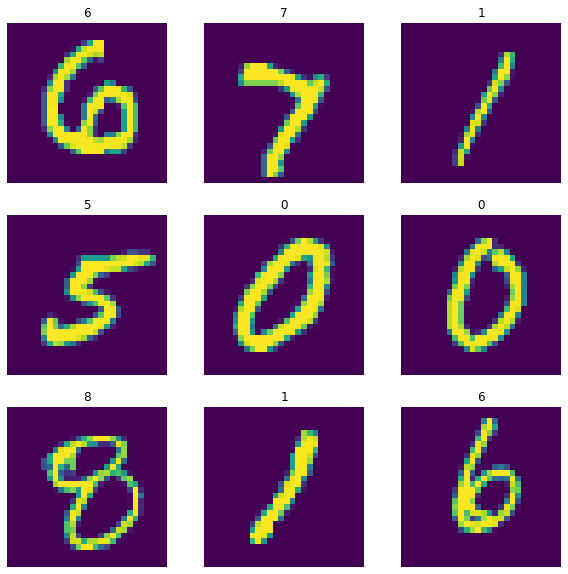

In [21]:
plt.figure(figsize = (10, 10))

for images, labels in ds_train.take(3):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis("off")

In [69]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')  
])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


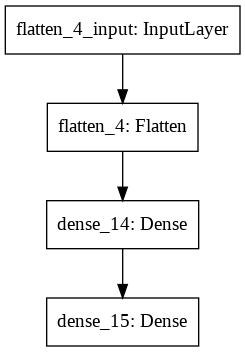

In [71]:
tf.keras.utils.plot_model(model)

In [72]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [73]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs = 15
)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3518 - accuracy: 0.9027 - val_loss: 0.1867 - val_accuracy: 0.9474
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1593 - accuracy: 0.9537 - val_loss: 0.1310 - val_accuracy: 0.9607
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1143 - accuracy: 0.9667 - val_loss: 0.1042 - val_accuracy: 0.9674
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9749 - val_loss: 0.0892 - val_accuracy: 0.9736
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0889 - val_accuracy: 0.9729
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.0737 - val_accuracy: 0.9771
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0480 - accuracy: 0.9861 - val_loss: 0.0720 - val_accuracy: 0.9769
Epoch 

In [74]:
for i in history.history:
  print(i)

loss
accuracy
val_loss
val_accuracy


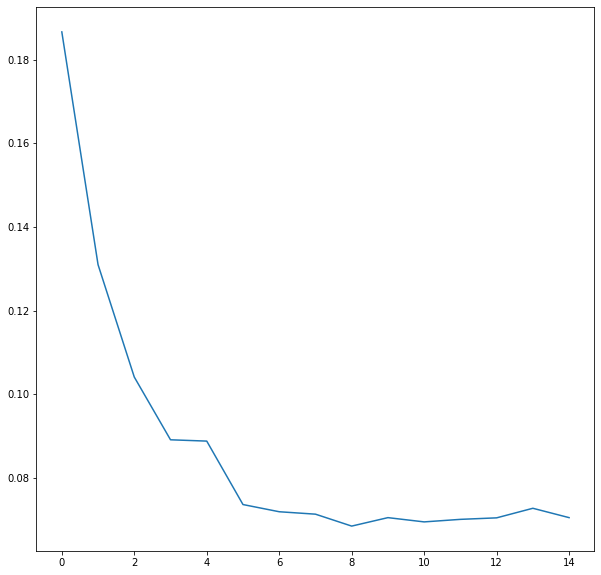

In [75]:
plt.figure(figsize = (10, 10))
plt.plot(range(15), history.history['val_loss'])

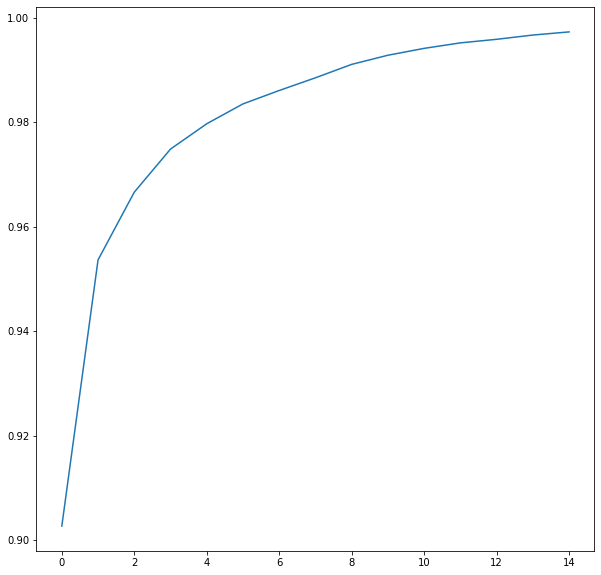

In [76]:
plt.figure(figsize = (10, 10))
plt.plot(range(15), history.history['accuracy'])

In [77]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9785


[0.07056189328432083, 0.9785000085830688]

In [78]:
pred = model.predict(ds_test)

In [79]:
pred

array([[2.5331431e-10, 4.0921489e-12, 1.0093203e-11, ..., 1.3707191e-12,
        2.1209332e-10, 1.6554575e-08],
       [3.2186666e-14, 9.7335820e-11, 1.0876312e-11, ..., 5.3044206e-13,
        4.6924189e-08, 4.9159548e-11],
       [5.1463933e-13, 8.9677703e-11, 2.1259680e-12, ..., 4.7592729e-13,
        7.5872408e-10, 1.2821467e-08],
       ...,
       [6.6225914e-09, 1.4361197e-10, 8.6497165e-10, ..., 1.6122526e-19,
        1.1846320e-10, 1.4458544e-14],
       [1.0000000e+00, 6.2041596e-19, 1.3351805e-11, ..., 4.6396526e-11,
        1.7655443e-14, 1.1765482e-10],
       [4.8641655e-12, 9.4406633e-13, 5.9397104e-10, ..., 9.9999964e-01,
        3.5376751e-14, 1.4005330e-07]], dtype=float32)

In [80]:
pred = list(map(lambda x : np.argmax(x), pred))

In [81]:
pred

[5,
 3,
 3,
 6,
 1,
 3,
 2,
 9,
 2,
 7,
 3,
 2,
 9,
 3,
 6,
 9,
 1,
 4,
 0,
 1,
 7,
 9,
 8,
 7,
 7,
 3,
 2,
 5,
 5,
 2,
 2,
 7,
 7,
 1,
 2,
 4,
 5,
 0,
 8,
 2,
 3,
 6,
 3,
 6,
 6,
 9,
 6,
 3,
 3,
 7,
 0,
 6,
 9,
 4,
 2,
 5,
 7,
 1,
 4,
 7,
 8,
 3,
 6,
 3,
 9,
 8,
 9,
 2,
 3,
 1,
 6,
 8,
 1,
 5,
 3,
 1,
 9,
 5,
 6,
 4,
 0,
 8,
 6,
 2,
 3,
 4,
 0,
 6,
 9,
 4,
 4,
 0,
 6,
 2,
 3,
 1,
 5,
 4,
 8,
 4,
 2,
 5,
 7,
 4,
 0,
 4,
 4,
 2,
 5,
 3,
 6,
 3,
 4,
 2,
 0,
 4,
 8,
 3,
 2,
 1,
 1,
 6,
 2,
 4,
 8,
 5,
 5,
 2,
 7,
 4,
 0,
 4,
 1,
 0,
 0,
 0,
 8,
 0,
 2,
 8,
 9,
 8,
 1,
 9,
 9,
 9,
 6,
 2,
 2,
 9,
 8,
 1,
 2,
 1,
 0,
 6,
 6,
 2,
 5,
 9,
 1,
 4,
 6,
 1,
 3,
 9,
 4,
 5,
 2,
 3,
 3,
 8,
 7,
 5,
 8,
 8,
 2,
 4,
 5,
 1,
 1,
 4,
 5,
 2,
 9,
 8,
 1,
 9,
 3,
 2,
 0,
 2,
 1,
 3,
 3,
 4,
 6,
 8,
 3,
 8,
 9,
 3,
 0,
 6,
 8,
 4,
 9,
 1,
 2,
 9,
 2,
 5,
 6,
 8,
 7,
 4,
 3,
 0,
 4,
 5,
 1,
 8,
 0,
 0,
 9,
 0,
 1,
 6,
 7,
 0,
 4,
 6,
 6,
 0,
 0,
 8,
 0,
 4,
 9,
 3,
 9,
 3,
 6,
 1,
 7,
 4,
 5,
 8,
 0,
 0,
